In [186]:
import pandas as pd
import os
import numpy as np
import datetime as dt
from shutil import which, copyfileobj
import gzip

LOC = 'ny' # 'ny', 'paris', 'london'

print(len(os.listdir(f'./data/{LOC}/')))
if len(os.listdir(f'./data/{LOC}/')) == 0:
    if which('wget') is None:
        %conda install wget
#     if LOC == 'ny':
#         !wget http://data.insideairbnb.com/united-states/new-york-city/ny/2021-07-06/data/listings.csv.gz
#         !wget http://data.insideairbnb.com/united-states/new-york-city/ny/2021-07-06/data/reviews.csv.gz
#     elif LOC == 'paris':
#         !wget http://data.insideairbnb.com/france/ile-de-france/paris/2021-07-06/data/listings.csv.gz
#         !wget http://data.insideairbnb.com/france/ile-de-france/paris/2021-07-06/data/reviews.csv.gz
#     elif LOC == 'london':
#         !wget http://data.insideairbnb.com/united-kingdom/england/london/2021-07-06/data/listings.csv.gz
#         !wget http://data.insideairbnb.com/united-kingdom/england/london/2021-07-06/data/reviews.csv.gz

    with gzip.open(f'./reviews.csv.gz', 'rb') as f_in:
        with open(f'./data/{LOC}/reviews.csv', 'wb') as f_out:
            copyfileobj(f_in, f_out)
    with gzip.open(f'./listings.csv.gz', 'rb') as f_in:
        with open(f'./data/{LOC}/listings.csv', 'wb') as f_out:
            copyfileobj(f_in, f_out)


3


In [187]:
filename = f"./data/{LOC}/reviews.csv"
df = pd.read_csv(filename)

In [188]:
import nltk

nltk.download('stopwords')
STOP = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ryanegbert/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [189]:
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839321 entries, 0 to 839320
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     839321 non-null  int64 
 1   id             839321 non-null  int64 
 2   date           839321 non-null  object
 3   reviewer_id    839321 non-null  int64 
 4   reviewer_name  839314 non-null  object
 5   comments       838509 non-null  object
dtypes: int64(3), object(3)
memory usage: 38.4+ MB


In [191]:
df.comments.astype(str)

0         Notre séjour de trois nuits.\r<br/>Nous avons ...
1                                         Great experience.
2         I've stayed with my friend at the Midtown Cast...
3         We've been staying here for about 9 nights, en...
4         We had a wonderful stay at Jennifer's charming...
                                ...                        
839316                                     Very lovely home
839317    The host canceled this reservation the day bef...
839318    Christopher's place is really well located. It...
839319    Nice place , comfy, all what you need for nice...
839320    Host has been very kind and responsive. <br/>T...
Name: comments, Length: 839321, dtype: object

In [192]:
df.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [193]:
df.comments = df.comments.astype(str)
df.date = pd.to_datetime(df.date)

df = df[df.date > pd.to_datetime(dt.date(2019,12,31))]

In [194]:
def replace_symbols(text):
    text = text.lower()
    symbols = ['.',',','<','\\','/','>','(',')','[',']','-','_','+','=','!','@','#','’','\'',':',';','?','$','&','*']
    for s in symbols:
        if s in text:
            text = text.replace(s, '')
    
    return ' '.join(word for word in text.split() if word not in STOP)


df['review_simple'] = df.comments.apply(replace_symbols)

In [195]:
start_p1 = pd.to_datetime(dt.date(2020,1,1))
end_p1 = pd.to_datetime(dt.date(2020,2,29))
start_p2 = pd.to_datetime(dt.date(2020,3,1))
end_p2 = pd.to_datetime(dt.date(2020,7,31))
start_p3 = pd.to_datetime(dt.date(2020,8,1))
end_p3 = pd.to_datetime(dt.date(2020,12,31))
start_p4 = pd.to_datetime(dt.date(2021,1,1))
end_p4 = pd.to_datetime('today')

In [196]:
df.shape

(194628, 7)

In [197]:
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,review_simple
347,3831,588410318,2020-01-04,47646626,Thorsten,We had a nice stay with Lisa in Brooklyn. Espe...,nice stay lisa brooklyn especially tips helpfu...
348,3831,589143289,2020-01-05,23587571,Rodrigo,The location it’s fantastic. Even it’s an enti...,location fantastic even entire place doesnt fe...
349,3831,594037833,2020-01-17,300301942,Sungho,아이들이 있는 집은 최고의 숙소입니다<br/>저희 아이가 주인집 아이들과 매일 같이...,아이들이 있는 집은 최고의 숙소입니다br저희 아이가 주인집 아이들과 매일 같이 놀았...
350,3831,596029798,2020-01-21,109396060,Catalina Fernanda,La estadía fué buena está cerca del metro y de...,la estadía fué buena está cerca del metro de t...
351,3831,597434314,2020-01-25,2308141,Trafton,Lisa Roxanne was a great host and very accomod...,lisa roxanne great host accomodating youre loo...


In [198]:
pre_covid = df[(df.date > start_p1) & (df.date < end_p1)]
covid = df[(df.date > start_p2) & (df.date < end_p2)]
pre_vaccine = df[(df.date > start_p3) & (df.date < end_p3)]
post_vaccine = df[(df.date > start_p4) & (df.date < end_p4)]

In [199]:
print(pre_covid.shape)
print(covid.shape)
print(pre_vaccine.shape)
print(post_vaccine.shape)

(26777, 7)
(24948, 7)
(41782, 7)
(96724, 7)


In [204]:
pre_covid.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,review_simple
347,3831,588410318,2020-01-04,47646626,Thorsten,We had a nice stay with Lisa in Brooklyn. Espe...,nice stay lisa brooklyn especially tips helpfu...
348,3831,589143289,2020-01-05,23587571,Rodrigo,The location it’s fantastic. Even it’s an enti...,location fantastic even entire place doesnt fe...
349,3831,594037833,2020-01-17,300301942,Sungho,아이들이 있는 집은 최고의 숙소입니다<br/>저희 아이가 주인집 아이들과 매일 같이...,아이들이 있는 집은 최고의 숙소입니다br저희 아이가 주인집 아이들과 매일 같이 놀았...
350,3831,596029798,2020-01-21,109396060,Catalina Fernanda,La estadía fué buena está cerca del metro y de...,la estadía fué buena está cerca del metro de t...
351,3831,597434314,2020-01-25,2308141,Trafton,Lisa Roxanne was a great host and very accomod...,lisa roxanne great host accomodating youre loo...


In [205]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [208]:
nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ryanegbert/nltk_data...


In [263]:
num = 1
for df in [pre_covid, covid, pre_vaccine, post_vaccine]:
    print("DataFrame " + str(num) + "...")
    df['sentiment'] = df.review_simple.apply(sia.polarity_scores)
    df.sentiment = df.sentiment.apply(lambda x: x['compound'])
    num += 1

DataFrame 1...
DataFrame 2...
DataFrame 3...
DataFrame 4...


In [264]:
pre_covid.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,review_simple,sentiment
347,3831,588410318,2020-01-04,47646626,Thorsten,We had a nice stay with Lisa in Brooklyn. Espe...,nice stay lisa brooklyn especially tips helpfu...,0.8307
348,3831,589143289,2020-01-05,23587571,Rodrigo,The location it’s fantastic. Even it’s an enti...,location fantastic even entire place doesnt fe...,0.8220
349,3831,594037833,2020-01-17,300301942,Sungho,아이들이 있는 집은 최고의 숙소입니다<br/>저희 아이가 주인집 아이들과 매일 같이...,아이들이 있는 집은 최고의 숙소입니다br저희 아이가 주인집 아이들과 매일 같이 놀았...,0.0000
350,3831,596029798,2020-01-21,109396060,Catalina Fernanda,La estadía fué buena está cerca del metro y de...,la estadía fué buena está cerca del metro de t...,0.0000
351,3831,597434314,2020-01-25,2308141,Trafton,Lisa Roxanne was a great host and very accomod...,lisa roxanne great host accomodating youre loo...,0.8481


DataFrame 1 ...
There are 203668 words in the combination of all review.


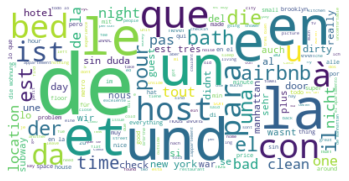

DataFrame 2 ...
There are 155735 words in the combination of all review.


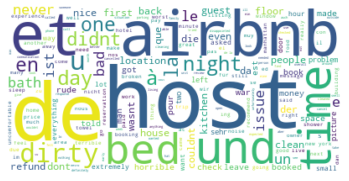

DataFrame 3 ...
There are 234166 words in the combination of all review.


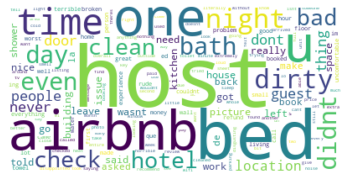

DataFrame 4 ...
There are 573775 words in the combination of all review.


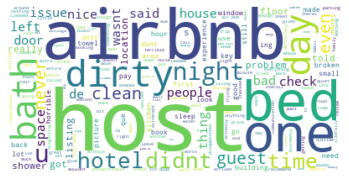

In [267]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

dfs = ['pre_covid', 'covid', 'pre_vaccine', 'post_vaccine']

num = 0
for df in [pre_covid, covid, pre_vaccine, post_vaccine]:
    print('DataFrame ' + str(num + 1) + " ...")
    text = " ".join(review for review in df[df.sentiment < 0].review_simple)
    print ("There are {} words in the combination of all review.".format(len(text)))
    text = text.replace('place','').replace('stay','').replace('apartment','').replace('room','')

    wordcloud = WordCloud(max_font_size=100, max_words=200, background_color="white").generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig(dfs[num] + "_neg.png")
    plt.show()
    num += 1

DataFrame 1 ...
There are 3532173 words in the combination of all review.


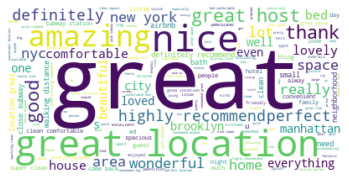

DataFrame 2 ...
There are 2901450 words in the combination of all review.


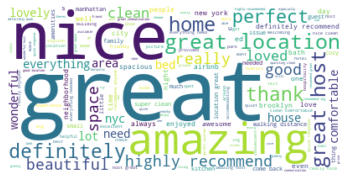

DataFrame 3 ...
There are 4956933 words in the combination of all review.


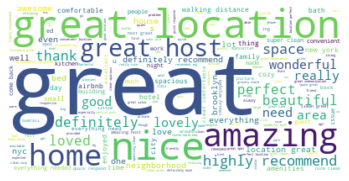

DataFrame 4 ...
There are 12364167 words in the combination of all review.


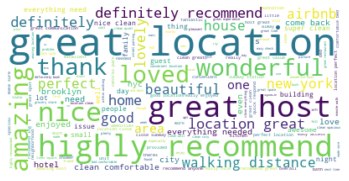

In [268]:
num = 0
for df in [pre_covid, covid, pre_vaccine, post_vaccine]:
    print('DataFrame ' + str(num + 1) + " ...")
    text = " ".join(review for review in df[df.sentiment > 0].review_simple)
    print ("There are {} words in the combination of all review.".format(len(text)))
    text = text.replace('place','').replace('stay','').replace('apartment','').replace('room','')

    wordcloud = WordCloud(max_font_size=100, max_words=200, background_color="white").generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig(dfs[num] + "_pos.png")
    plt.show()
    num += 1